<a href="https://colab.research.google.com/github/Aakash50909/Cognitive-Computing-Assignments/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
import re
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud



from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
text="""Tate McRae is a Canadian pop singer known for her emotional lyrics and moody, catchy sound. Her voice has an airy, breathy tone that makes her music feel intimate and honest. She often sings about heartbreak, confusion, and growing up, capturing the messy emotions of youth. There's a soft vulnerability in her songs, but also a quiet strength that shines through. Her vibe is real and raw, with a cool edge that feels effortless. Whether she's dancing or singing, she brings a unique energy that makes her stand out in today’s pop scene."""
tl=text.lower();
t2=re.sub(r'[^\w\s]','',tl)
print(t2)
tw=word_tokenize(t2);
ts=sent_tokenize(t2);
st=t2.split()
print(tw)
print(ts)
print(st)

tate mcrae is a canadian pop singer known for her emotional lyrics and moody catchy sound her voice has an airy breathy tone that makes her music feel intimate and honest she often sings about heartbreak confusion and growing up capturing the messy emotions of youth theres a soft vulnerability in her songs but also a quiet strength that shines through her vibe is real and raw with a cool edge that feels effortless whether shes dancing or singing she brings a unique energy that makes her stand out in todays pop scene
['tate', 'mcrae', 'is', 'a', 'canadian', 'pop', 'singer', 'known', 'for', 'her', 'emotional', 'lyrics', 'and', 'moody', 'catchy', 'sound', 'her', 'voice', 'has', 'an', 'airy', 'breathy', 'tone', 'that', 'makes', 'her', 'music', 'feel', 'intimate', 'and', 'honest', 'she', 'often', 'sings', 'about', 'heartbreak', 'confusion', 'and', 'growing', 'up', 'capturing', 'the', 'messy', 'emotions', 'of', 'youth', 'theres', 'a', 'soft', 'vulnerability', 'in', 'her', 'songs', 'but', 'al

{'that', 'hadn', 'below', 'such', 'has', "weren't", 'about', 'll', 'shouldn', 'your', "you've", 'over', 'but', 'when', "haven't", "you'll", 'i', "i'd", "aren't", "we've", 'his', 'nor', 'being', 'own', 'needn', "wasn't", 'again', 'if', 'what', 'few', "you'd", 'am', 'whom', 'themselves', 'me', 'how', 'd', 'should', 'there', 'o', 'have', 'to', 'a', "he's", 'doesn', 'each', "they'll", 'into', 'any', 'once', 'who', "shouldn't", "we're", 'too', 'at', "won't", 'do', 'isn', 'ain', 'most', 's', 'she', "they've", 'those', 'which', 'they', 'and', 'herself', 'myself', 'shan', 'the', 'himself', 'was', 'here', "mustn't", 'until', 'above', 'only', 'couldn', "don't", "hasn't", 'our', 'down', 're', "it'd", 'weren', 'him', 'will', "i've", 'are', 'mightn', 'all', "it's", 'were', 'not', 'ma', 'didn', 'this', 'yourselves', "we'd", 'it', 'before', 'through', "wouldn't", 'so', 'doing', "didn't", 'mustn', "they're", "i'll", 'very', "it'll", 'further', 'its', 'why', 'won', 'of', 'haven', 'other', "he'd", 'up',

<Axes: xlabel='Samples', ylabel='Counts'>

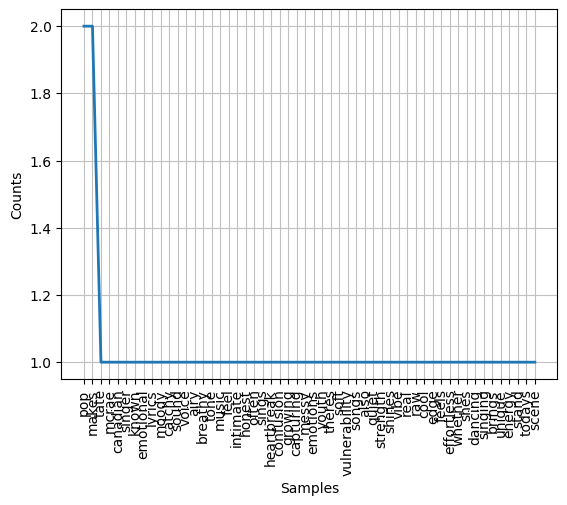

In [5]:
stop=set(stopwords.words('english'))
print(stop)

filtered =[w for w in st if not w in stop]
print(filtered)

fd=FreqDist(filtered)
fd.plot()

In [6]:
nltk.download('wordnet')
words=re.findall(r'\b[a-zA-z]+\b',text)
fil=[w for w in st if w not in words]
print(words)
print()

ps=PorterStemmer()
wnl=WordNetLemmatizer()
s1=[ps.stem(w) for w in filtered]
s2=[wnl.lemmatize(w) for w in filtered]
print(s1)
print(s2)


[nltk_data] Downloading package wordnet to /root/nltk_data...


['Tate', 'McRae', 'is', 'a', 'Canadian', 'pop', 'singer', 'known', 'for', 'her', 'emotional', 'lyrics', 'and', 'moody', 'catchy', 'sound', 'Her', 'voice', 'has', 'an', 'airy', 'breathy', 'tone', 'that', 'makes', 'her', 'music', 'feel', 'intimate', 'and', 'honest', 'She', 'often', 'sings', 'about', 'heartbreak', 'confusion', 'and', 'growing', 'up', 'capturing', 'the', 'messy', 'emotions', 'of', 'youth', 'There', 's', 'a', 'soft', 'vulnerability', 'in', 'her', 'songs', 'but', 'also', 'a', 'quiet', 'strength', 'that', 'shines', 'through', 'Her', 'vibe', 'is', 'real', 'and', 'raw', 'with', 'a', 'cool', 'edge', 'that', 'feels', 'effortless', 'Whether', 'she', 's', 'dancing', 'or', 'singing', 'she', 'brings', 'a', 'unique', 'energy', 'that', 'makes', 'her', 'stand', 'out', 'in', 'today', 's', 'pop', 'scene']

['tate', 'mcrae', 'canadian', 'pop', 'singer', 'known', 'emot', 'lyric', 'moodi', 'catchi', 'sound', 'voic', 'airi', 'breathi', 'tone', 'make', 'music', 'feel', 'intim', 'honest', 'ofte

In [7]:
texts = [
    "The battery life on this phone is insane—it lasted me two full days.",
    "Camera quality is top-notch, even in low light.",
    "Feels super smooth while gaming, no lags at all."
]

cv=CountVectorizer()
tfidf=TfidfVectorizer()

v1=cv.fit_transform(texts)
v2=tfidf.fit_transform(texts)

print(v1.toarray())
print(cv.get_feature_names_out())

print()

print(v2.toarray())
print(tfidf.get_feature_names_out())


for i, row in enumerate(v2):
    scores = zip(tfidf.get_feature_names_out(), row.toarray()[0])
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top3 = [word for word, score in sorted_scores[:3]]
    print(f"Top 3 keywords for Text {i+1}:", top3)

[[0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0]
 [0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1]]
['all' 'at' 'battery' 'camera' 'days' 'even' 'feels' 'full' 'gaming' 'in'
 'insane' 'is' 'it' 'lags' 'lasted' 'life' 'light' 'low' 'me' 'no' 'notch'
 'on' 'phone' 'quality' 'smooth' 'super' 'the' 'this' 'top' 'two' 'while']

[[0.         0.         0.27137867 0.         0.27137867 0.
  0.         0.27137867 0.         0.         0.27137867 0.20639047
  0.27137867 0.         0.27137867 0.27137867 0.         0.
  0.27137867 0.         0.         0.27137867 0.27137867 0.
  0.         0.         0.27137867 0.27137867 0.         0.27137867
  0.        ]
 [0.         0.         0.         0.34142622 0.         0.34142622
  0.         0.         0.         0.34142622 0.         0.25966344
  0.         0.         0.         0.         0.34142622 0.34142622
  0.         0.         0.34142622 0.        

In [8]:
text1 = set("AI is transforming industries with smarter automation and predictive capabilities..".split())
text2 = set("Blockchain ensures secure, transparent, and tamper-proof digital transactions.".split())

jaccard=len(text1&text2)/len(text1|text2)
print(jaccard)

vec2=tfidf.fit_transform(["AI is transforming industries with smarter automation and predictive capabilities..","Blockchain ensures secure, transparent, and tamper-proof digital transactions."])
cosS=cosine_similarity(vec2[0:1],vec2[1:2])
print(cosS)

0.058823529411764705
[[0.05629716]]


In [10]:
reviews = [
    "The Nothing Phone 2 feels premium and delivers smooth performance.",
    "Battery life could be better, but the design is eye-catching.",
    "Decent overall, though the camera still needs some improvements."
]


positive_reviews = []
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"Review: {review}\nPolarity: {polarity}, Subjectivity: {subjectivity}, Sentiment: {sentiment}\n")
    if sentiment == "Positive":
        positive_reviews.append(review)

Review: The Nothing Phone 2 feels premium and delivers smooth performance.
Polarity: 0.4, Subjectivity: 0.5, Sentiment: Positive

Review: Battery life could be better, but the design is eye-catching.
Polarity: 0.5, Subjectivity: 0.5, Sentiment: Positive

Review: Decent overall, though the camera still needs some improvements.
Polarity: 0.08333333333333333, Subjectivity: 0.3333333333333333, Sentiment: Positive



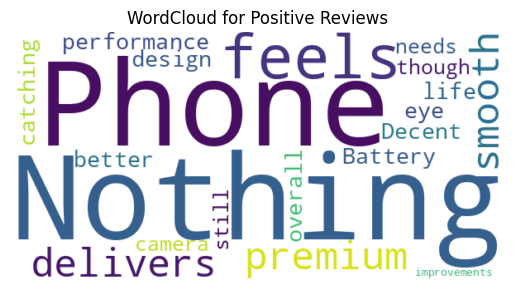

In [11]:
wc_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(wc_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Positive Reviews")
plt.show()

In [15]:

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np
import tensorflow as tf

training_text = """
The Samsung Galaxy S24 Ultra is a powerhouse flagship packed with cutting-edge features. It boasts a stunning 6.8-inch AMOLED display with 120Hz refresh rate, delivering crisp visuals and smooth interactions. Powered by the latest Snapdragon chip, it handles multitasking and gaming effortlessly. The quad-camera setup, including a 200MP main sensor, captures incredible detail in every shot. Battery life is solid, easily lasting a full day, and fast charging adds convenience. With a sleek titanium build, S Pen support, and AI-powered features for productivity and photography, the S24 Ultra sets a high bar for premium Android smartphones in 2024.
"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
words = training_text.lower().split()
for i in range(1, len(words)):
    seq = words[:i+1]
    token_list = tokenizer.texts_to_sequences([" ".join(seq)])[0]
    input_sequences.append(token_list)

max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

# Separate input & labels
X = input_sequences[:, :-1]
y = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=total_words)

# 3. Model
model = Sequential([
    Embedding(total_words, 10, input_length=max_len-1),
    LSTM(64),
    Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=300, verbose=0)


seed_text = "smooth"
next_words = 5

for _ in range(next_words):
    token_seq = tokenizer.texts_to_sequences([seed_text])[0]
    token_seq = pad_sequences([token_seq], maxlen=max_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_seq, verbose=0), axis=-1)
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed_text += " " + word
            break

print("Generated text:", seed_text)


Generated text: smooth galaxy galaxy galaxy ultra is
